In [75]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris_dataset['data'][:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
        iris_dataset['data'], iris_dataset['target'], random_state=0)

In [14]:
iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

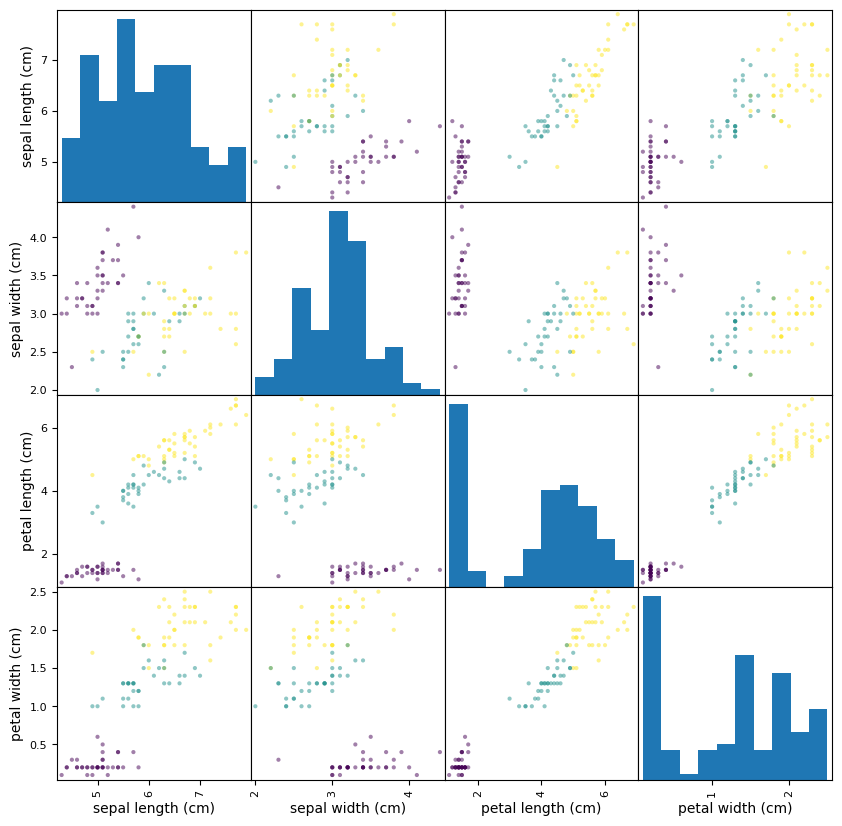

In [22]:
grr = pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(10, 10))

In [44]:
knn = KNeighborsClassifier(n_neighbors=1knn.score(X_test, y_test))

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
X_new = np.array([[5, 2.9, 1, 0.2]])

In [32]:
prediction = knn.predict(X_new)

In [33]:
iris_dataset['target_names'][prediction]

array(['setosa'], dtype='<U10')

In [42]:
y_pred = knn.predict(X_test)

In [43]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [46]:
knn.score(X_test, y_test)

0.9736842105263158

In [50]:
X, y = mglearn.datasets.make_forge()

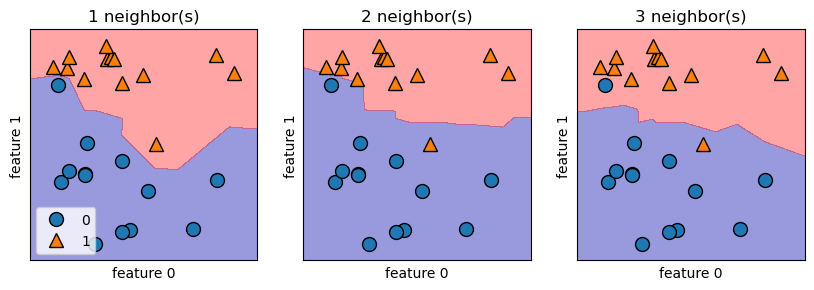

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 2, 3], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [61]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [70]:
training_accuracy = [] 
test_accuracy = []
neighbors_settings = range(1, 21)

In [71]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train)) 
    test_accuracy.append(clf.score(X_test, y_test))

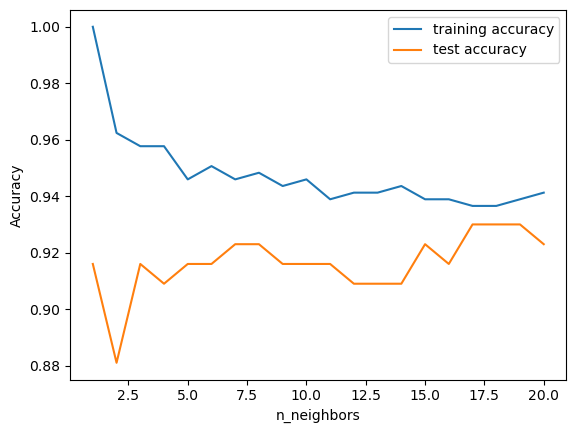

In [72]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

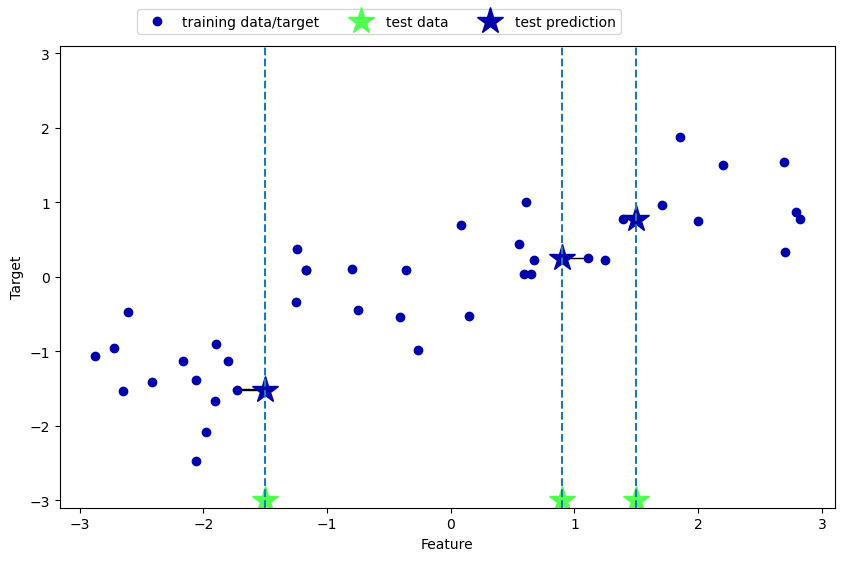

In [73]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

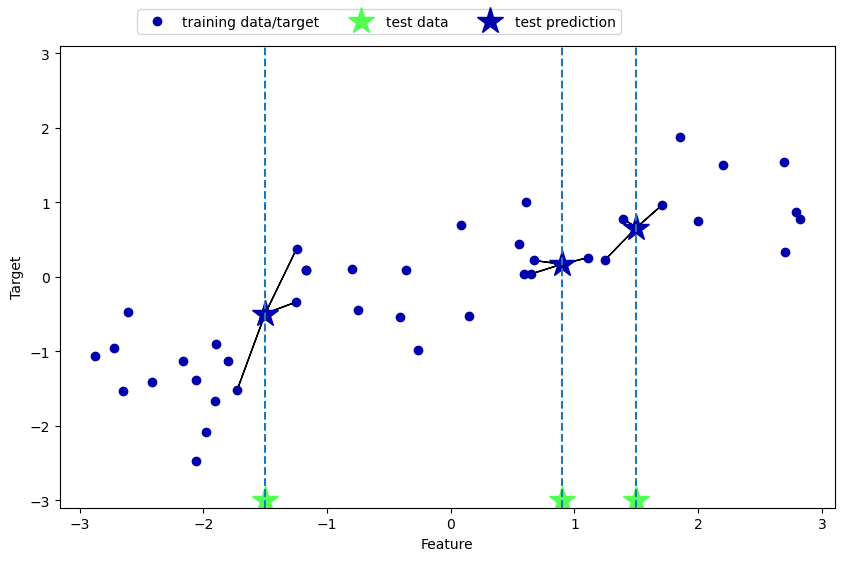

In [74]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [76]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [78]:
reg = KNeighborsRegressor(n_neighbors=3)

In [79]:
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [81]:
reg.score(X_test, y_test)

0.8344172446249606